## Adaptive Filters LMS algorithm

#### Part 1. 

##### The example given in class simulating the inaccurate accelerometer data and filtering it to resemble the accurate sensor has been uploaded to BB as a word readable file. Make your own code to re-create this, or something similar. You should end up with a running average filter.
##### This code can then be used for part 2.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f=0.2 # Frequency of the signal
p=5
a=2*np.pi*f # Angular frequency of the signal (2 * pi * f)
ncycle=12 # Number of cycles for the rolling signal
t_roll = 12 * int((1/f))
t_pause=0
t_total=4*t_pause + 3*t_roll # 4*t_pause represents the pauses, and 3*t_roll accounts for rolling time
sample_freq=100 # Sampling frequency in Hz (samples per second)
total_sample= sample_freq * t_total # Total number of samples based on sample frequency and total time
time = np.arange(total_sample)/sample_freq
x = len(time) # Length of the time array

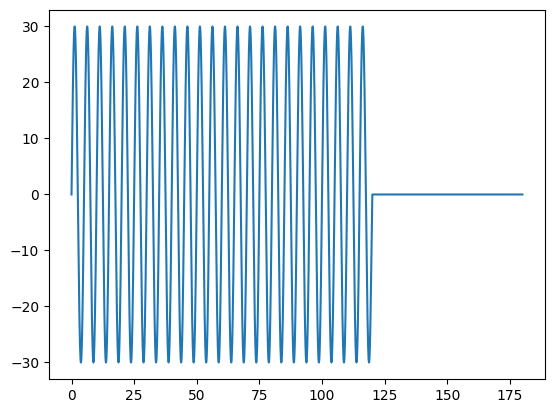

In [3]:
# Initialize roll array
roll = np.zeros(x)

# Assign values to roll based on time intervals
for i in range(x):
    if time[i] < t_pause:
        roll[i] = 0
    elif time[i] < t_pause + t_roll:
        roll[i] = 30 * np.sin(2 * np.pi * f * time[i])
    elif time[i] < 2 * t_pause + t_roll:
        roll[i] = 0
    elif time[i] < 2 * (t_pause + t_roll):
        roll[i] = 30 * np.sin(2 * np.pi * f * time[i])
    else:
        roll[i] = 0

# Plot roll over time
plt.plot(time, roll)


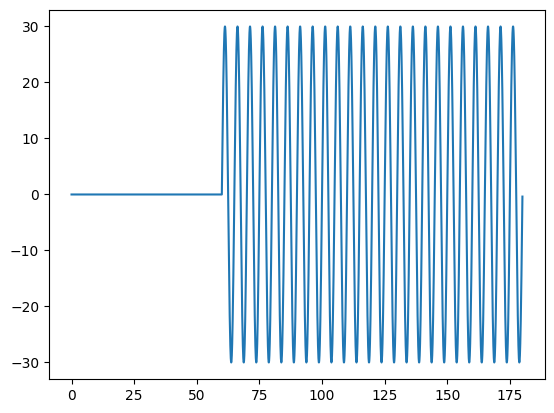

In [4]:
# Initialize pitch array
pitch = np.zeros(x)

# Assign values to pitch based on time intervals
for i in range(x):
    if time[i] < 2 * t_pause + t_roll:
        pitch[i] = 0
    elif time[i] < 2 * (t_pause + t_roll):
        pitch[i] = 30 * np.sin(2 * np.pi * f * time[i])
    elif time[i] < 3 * t_pause + 2 * t_roll:
        pitch[i] = 0
    elif time[i] < 3 * (t_pause + t_roll):
        pitch[i] = 30 * np.sin(2 * np.pi * f * time[i])
    else:
        pitch[i] = 0

# Plot pitch over time
plt.plot(time, pitch)


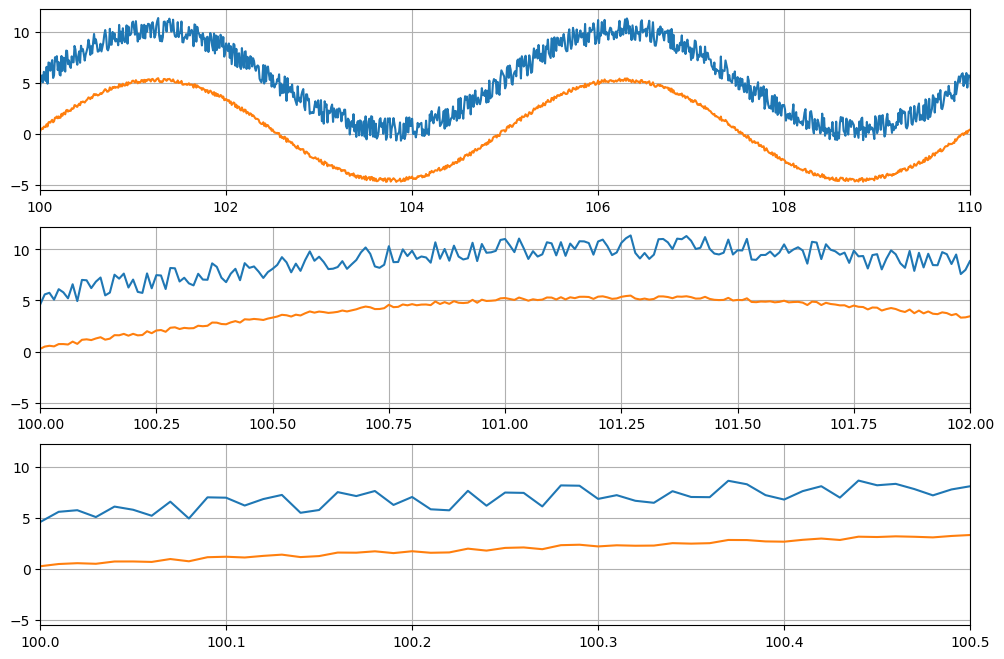

In [5]:
# Gravitational constant
grav = 9.807

# Calculate X-axis acceleration based on pitch angle
AccXi = grav * np.sin(pitch * np.pi / 180)

# Define maximum measurable acceleration and accuracy factors
AccMaxMes = 8 * grav
Accacc1 = 0.03 * AccMaxMes
Accacc2 = 0.005 * AccMaxMes

# Define offsets for the two measurements
Accoffset1 = 3
Accoffset2 = 0

# Generate random error for measurements
error = np.random.uniform(-0.5, 0.5, size=x)

# Simulated measurements with error
MAccX1 = AccXi + Accoffset1 + (Accacc1 * (1 - error))
MAccX2 = AccXi + Accoffset2 + (Accacc2 * (1 - error))

# Plot the measurements with different x-axis limits
plt.figure(figsize=(12, 8))

# Plot 1 with x-limits 100-110
plt.subplot(3, 1, 1)
plt.plot(time, MAccX1)
plt.plot(time, MAccX2)
plt.xlim(100, 110)
plt.grid(True)

# Plot 2 with x-limits 100-102
plt.subplot(3, 1, 2)
plt.plot(time, MAccX1)
plt.plot(time, MAccX2)
plt.xlim(100, 102)
plt.grid(True)

# Plot 3 with x-limits 100-100.5
plt.subplot(3, 1, 3)
plt.plot(time, MAccX1)
plt.plot(time, MAccX2)
plt.xlim(100, 100.5)
plt.grid(True)


In [6]:
import pandas as pd

# Calculate means and mean-centered values
average1 = np.mean(MAccX1)
average2 = np.mean(MAccX2)
MAccX1_m = MAccX1 - average1
MAccX2_m = MAccX2 - average2

# Initialize parameters for the LMS filter
M = 6                   # Filter length
mu = 0.00001            # Learning rate
w = np.zeros(M)         # Initial weights
total_sample = 18000    # Number of samples
x = MAccX1_m            # Input signal
d = MAccX2              # Desired signal

# Initialize arrays for LMS
u = np.zeros(M)
e = np.zeros(total_sample)
y = np.zeros(total_sample)

# Define LMS function
def LMS(x=MAccX1_m, d=MAccX2, w=np.zeros(6), M=6, total_sample=18000, mu=0.0001, e=np.zeros(total_sample)):
    W = []  # Store weights for each iteration
    y = np.zeros(total_sample)  # Output signal
    e = np.zeros(total_sample)  # Error signal
    
    # LMS algorithm
    for n in range(M - 1, total_sample):
        u = x[n - M + 1:n + 1]   # Current input vector
        y[n] = np.dot(w, u)      # Output of the filter
        e[n] = d[n] - y[n]       # Error signal
        w = w + mu * e[n] * u    # Update weights
        W.append(w.copy())       # Save current weights
    
    return y, W, e

# Run LMS function
y, W, e = LMS(x, d, w, M, total_sample, mu, e)


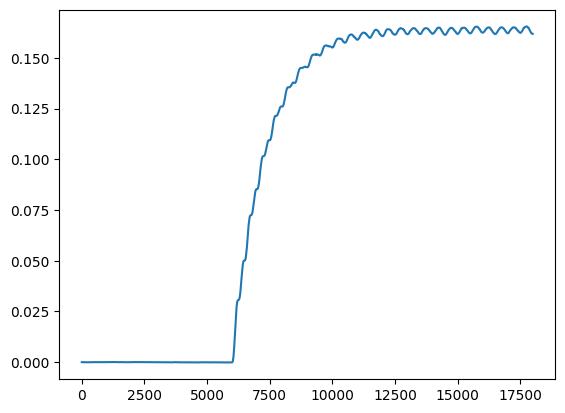

In [7]:
# Index to look up a specific weight vector component
lookup = 2
W = np.array(W)

# Extract the third component (index 2) of each weight vector
Wvec = W[:, lookup]

# Plot the extracted weight vector component over iterations
plt.plot(Wvec)


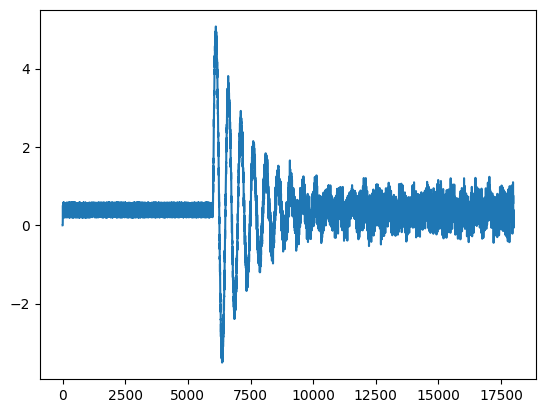

In [8]:
# Run LMS function to get the error signal
_, _, LMSerr = LMS(x, d, w, M, total_sample, mu)

# Plot the error signal
plt.plot(e)


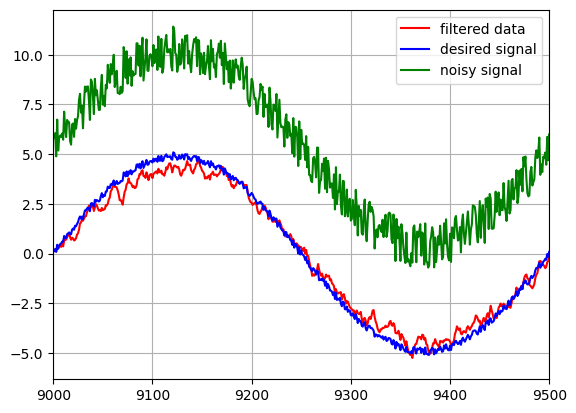

In [9]:
# Plot filtered data, desired signal, and noisy signal with labels and colors
plt.plot(y, label='filtered data', color="red")
plt.plot(MAccX2_m, label="desired signal", color="blue")
plt.plot(MAccX1, label="noisy signal", color="green")

# Set x-axis limits and display grid
plt.xlim(9000, 9500)
plt.grid(True)

# Show legend for the plots
plt.legend()


#### Part 2

The example given was a greyscale picture of about 100 x 100 pixels. Or maybe bigger. But you can use other data if you prefer.
The assignment and some possible analysis actions: (I don’t expect you to perform ALL of the actions below – but I do want you to get a good idea of what is going on)
Take a known signal. (for example the picture. But it can also be any other ‘reasonable signal’ (so no great changes of magnitude) – a sound wave, or a some sort of varying function that you make (combination of sin waves for example)). 


## 1.Picture processing

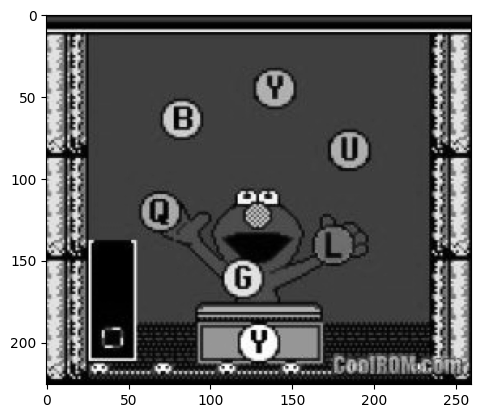

In [1]:
# Import necessary libraries
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

# URL of the image to fetch
url = 'https://raw.githubusercontent.com/minaghaderi/Linear-Algebra/refs/heads/main/R.jpeg'

# Send GET request to retrieve the image
lion = requests.get(url)

# Open the image, convert it to grayscale ('L' mode)
image = Image.open(BytesIO(lion.content)).convert('L')

# Display the image using matplotlib
plt.imshow(image, cmap='gray')

# Convert the image to a NumPy array for matrix representation
image_matrix = np.array(image)


Make sure that the population that the signal comes from has zero mean. For a greyscale picture that would mean subtracting 127 from each value. For a function made of sine and cosine waves, it already has a zero mean, so you won’t need to do anything. For a sound wave you will have to investigate how to turn it into a zero mean signal – what is the current average of the typical signal you have?


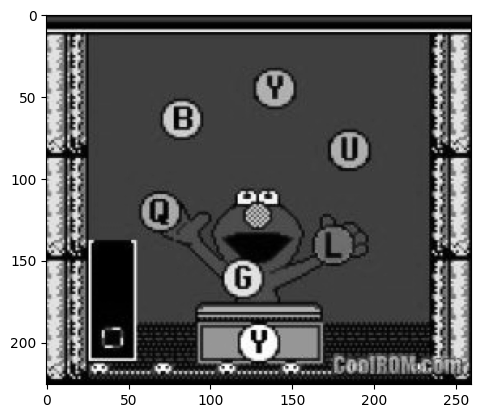

In [2]:
# Subtract the mean of the image from the image pixels
image_m = image - np.mean(image)

# Display the image (no change in display since it's the original)
plt.imshow(image, cmap='gray')


Add some noise to this signal. This noise should also have zero mean. Make the level of noise variable. For example with the picture, add a random number between {-level, +level} with level being a variable that you can play around with later. You can also choose which type of distribution this noise comes from. For example from a Standard Normal Distribution (SND) or from a uniform distribution. Or something else.

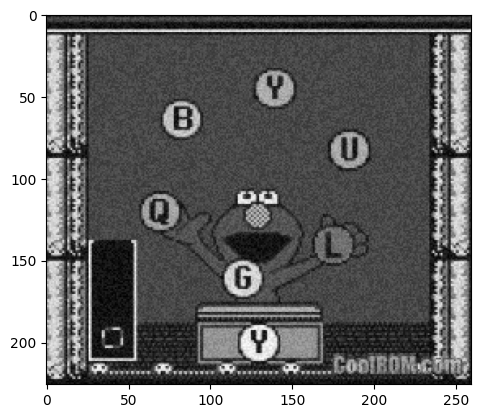

In [3]:
# Set noise level and generate noise with uniform distribution
level = 20
np.random.seed(0)
noise = np.random.uniform(-level, level, size=np.shape(image_m))

# Subtract mean from noise to center it
noise_m = noise - np.mean(noise)

# Add noise to the image
noisy_image = image_m + noise_m

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')


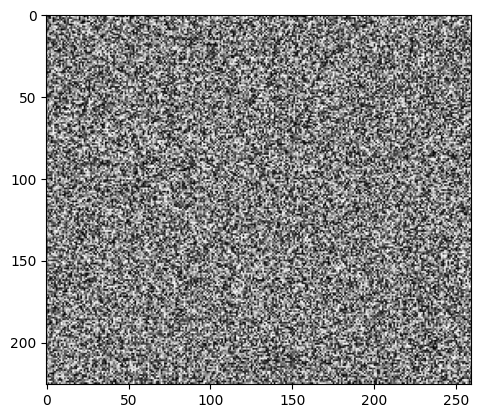

In [4]:
plt.imshow(noise_m,cmap='gray')

The Noisy signal is your input ‘u’. The original signal is the ‘desired ‘d’ ‘
If you are using a picture as a signal, ensure that the pixels are all next to each other, so that u(n+1) and u(n) have something to do with each other, and are not at different sides of the picture.


In [5]:
# Function to flatten a matrix in a zigzag pattern
def flatten_matrix(matrix):
    matrix = np.array(matrix)
    matrix_1d = np.zeros((matrix.size))  # Initialize flattened array
    r, c = 0, 0

    # Iterate through the matrix elements
    for counter in range(matrix.size):
        # For even rows, move right across columns
        if r % 2 == 0 and r < matrix.shape[0]:
            matrix_1d[counter] = matrix[r][c]
            if c == matrix.shape[1] - 1:  # Move to next row if end of column
                r += 1
            else:
                c += 1
        # For odd rows, move left across columns
        elif r % 2 != 0 and r < matrix.shape[0]:
            matrix_1d[counter] = matrix[r][c]
            if c == 0:  # Move to next row if end of column
                r += 1
            else:
                c -= 1
    return matrix_1d

# Function to reshape the 1D flattened matrix back into 2D matrix
def Unflatten_matrix(flatten_matrix, row, column):
    matrix = np.zeros((row, column))  # Initialize 2D matrix
    flatten_matrix = np.array(flatten_matrix)
    counter = 0

    # Iterate through rows and columns
    for r in range(row):
        for c in range(column):
            if r % 2 == 0:  # For even rows, move left to right
                matrix[r][c] = flatten_matrix[counter]
                counter += 1
            elif r % 2 != 0:  # For odd rows, move right to left
                matrix[r][-c] = flatten_matrix[counter]
                counter += 1
    return matrix


- Choose a step size for the LMS algorithm.

- Choose a number of coefficients to determine (‘M’ in the algorithm)

- Start the algorithm off with the w-vector = zero vector.

- Calculate the new w-vector. Go to the next step.

- Repeat this until the w-vector is not changing. This can be determined by examining the value of the error ‘e’.

- Keep track of the error. It should be decreasing all the time. Graph it.

- How long does the algorithm takes to converge?

(58760, 5)
After 58760.0 steps it has converged


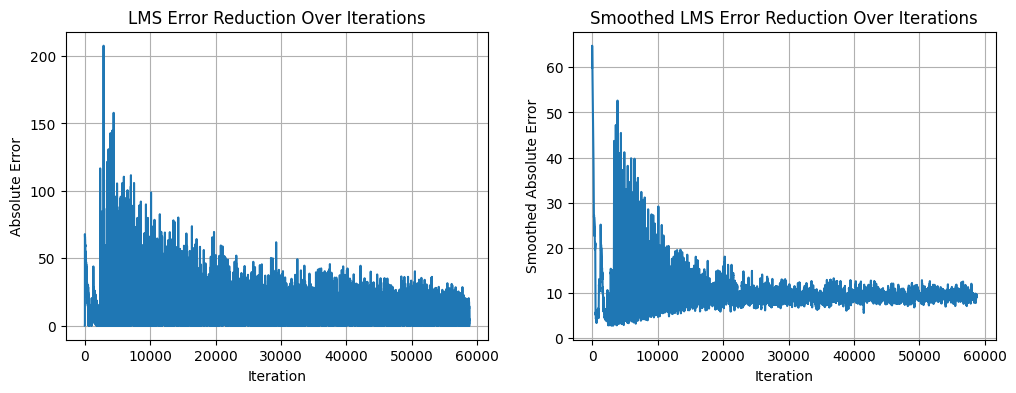

In [6]:
# LMS function to adapt weights and compute the error
def LMS(u, d, w, M, total_sample, mu):
    e = np.zeros(total_sample)  # Initialize error array
    
    # Iterate through each sample
    for n in range(M-1, total_sample-1):
        u_n = u[n-M+1:n+1][::-1]  # Take reversed input vector for current sample
        y = np.dot(w[n, :], u_n)  # Compute filter output
        e[n] = d[n] - y  # Calculate error
        # if 0 < abs(e[n]) < 0.0001:
        #     print(f'Converged at iteration {n}')
        #     break
        w[n+1, :] = w[n, :] + mu * e[n] * u_n  # Update weights using LMS rule

    return y, w, e

# Initial setup for LMS
u = noisy_image
mu = 0.0000001  # Learning rate
M = 5  # Filter length
total_sample = u.size  # Total number of samples
tolerance = 0.00001  # Convergence tolerance
d = image_m  # Desired signal

# Flatten the input and desired signals
u = flatten_matrix(u)
d = flatten_matrix(d)

# Initialize weight matrix
w = np.zeros((total_sample, M))

# Run LMS algorithm
y, w, e = LMS(u, d, w, M, total_sample, mu)
print(w.shape)
# Print the convergence step (number of iterations)
print(f'After {np.size(w) / M} steps it has converged')

plt.figure(figsize=(12, 4))
# Plot the absolute value of error over iterations
plt.subplot(1,2,1)
plt.plot(np.abs(e))
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.title('LMS Error Reduction Over Iterations')
plt.grid(True)


window_size = 50  # Adjust as needed
smoothed_error = np.convolve(np.abs(e), np.ones(window_size) / window_size, mode='valid')
plt.subplot(1,2,2)
plt.plot(smoothed_error)
plt.xlabel('Iteration')
plt.ylabel('Smoothed Absolute Error')
plt.title('Smoothed LMS Error Reduction Over Iterations')
plt.grid(True)
plt.show()

Is the output a much better (de-noised) signal than the noisy signal? (Don’t forget to add mean value again that you subtracted to turn it into a zero-mean signal. Be careful here – you may get impossible values which makes your programme crash. (A greyscale value of -5 for example, or 260. What will you do with that?))


In [7]:
# Initialize an array to store filter output
kk = np.zeros_like(u)

# Iterate over the samples and apply the filter
for i in range(M - 1, total_sample - M):
    # Compute the filter output using the weights and input vector (reversed)
    kk[i] = np.dot(w[-1, :], u[i - M + 1: i + 1][::-1])


Text(0.5, 1.0, 'filtered_image')

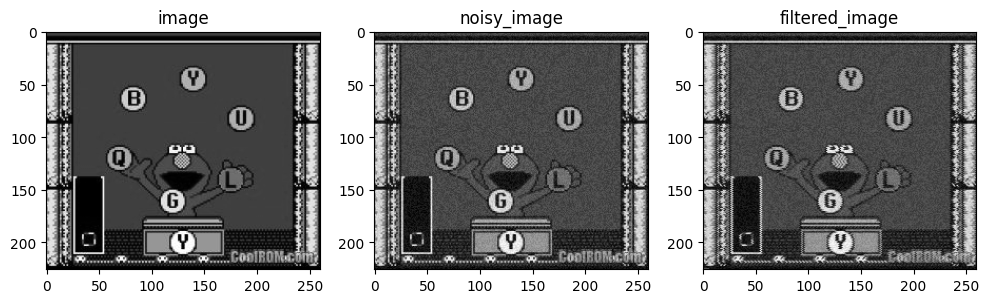

In [8]:
# Add the mean of the original image to the filtered output
kk = kk + np.mean(image)

# Unflatten the filtered data back into a 2D matrix
filtered_image = Unflatten_matrix(kk, noisy_image.shape[0], noisy_image.shape[1])

# Plot the original image, noisy image, and filtered image
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('noisy_image')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('filtered_image')


#### What happens if you change the step size?


Impact of Changing Step Size (mu)
In this LMS (Least Mean Squares) algorithm, the step size (mu) controls the rate at which the weights w are updated. Here’s how changing it would impact the algorithm:

Smaller Step Size (mu) leads to slower convergence but typically greater stability in the updates.
The weights adjust gradually, which is helpful to avoid overshooting or diverging.
However, if mu is too small, the algorithm may take many iterations to converge or might be too slow to make significant adjustments.
Larger Step Size (mu) results in faster convergence initially, as the weights are updated more significantly each step.
A large step size can, however, lead to instability and oscillations, where weights may diverge or never settle into optimal values.

#### What happens when you change the number of filter coefficients? Does the value of M have a linear or maybe an exponential effect on your run-time? And how does it affect the quality of the results?

Changing the number of filter coefficients, represented by M in the LMS algorithm, has a significant impact on both the run-time and quality of the filter's performance. 

- ‍‍‍‍`Run-Time`: Increasing M leads to a linear increase in run-time. Each iteration in the LMS algorithm involves calculating a dot product between w (the weight vector) and u_n (a segment of the input signal), both of which have length M. This means that the computational complexity for each iteration is proportional to M. Consequently, run-time increases linearly with M, as each additional coefficient requires one more multiplication and addition per iteration. Because the looped computations scale linearly with M, if M doubles, run-time will also approximately double, making it O(M × N), where N is the number of samples.

- `Result Quality`: While larger M values improve the filter's ability to model the signal, they do so with diminishing returns after an optimal point. Too large an M can also lead to overfitting where the filter starts adapting to the noise rather than suppressing it.

#### Every time you run the LMS algorithm you will obtain a set of ‘tap-weights’ (the w-vector). But this will change every time you run the whole algorithm. Run it a number of times. Do the values of the tap-weights vary a lot? (Average, standard deviation. Maybe draw a box-whisker plot or similar)

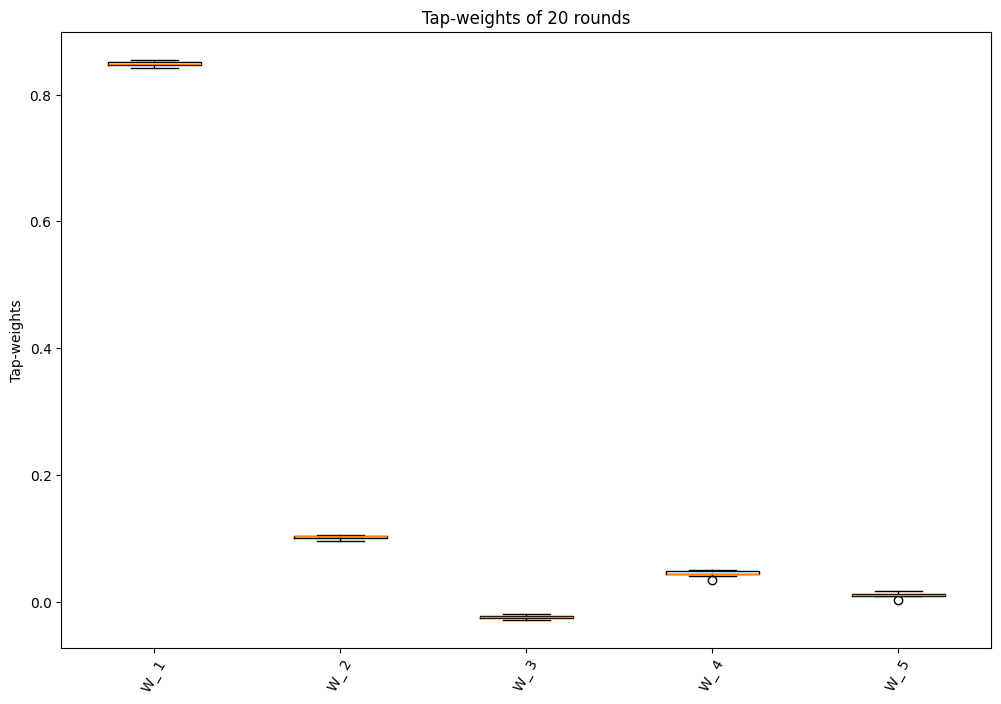

In [31]:
# Select the Second 20 rounds and transpose for plotting
z = []  # Select the Second 20 rounds and transpose

for i in range(15):
    noise = np.random.uniform(-30, 30, size=np.shape(image_m))
    noise_m = noise - np.mean(noise)
    noisy_image = image_m + noise_m
    u=noisy_image
    mu = 0.0000001  # Learning rate
    M = 5  # Filter length
    total_sample = u.size  # Total number of samples
    tolerance = 0.00001  # Convergence tolerance
    d = image_m  # Desired signal
    u = flatten_matrix(u)
    d = flatten_matrix(d)
    w = np.zeros((total_sample, M))
    _, w, _ = LMS(u, d, w, M, total_sample, mu)
    z.append(w[-1, :])

selected_w=np.array(z)

# Create a boxplot to visualize tap weights over 20 rounds
plt.figure(figsize=(12, 8))
plt.boxplot(selected_w, 
            tick_labels=[f"W_ {i+1}" for i in range(5)])  # Automatically label rounds)

# Add title and labels to the plot
plt.title('Tap-weights of 20 rounds')
plt.ylabel('Tap-weights')

# Rotate x-tick labels for better readability
plt.xticks(rotation=60)
plt.show()


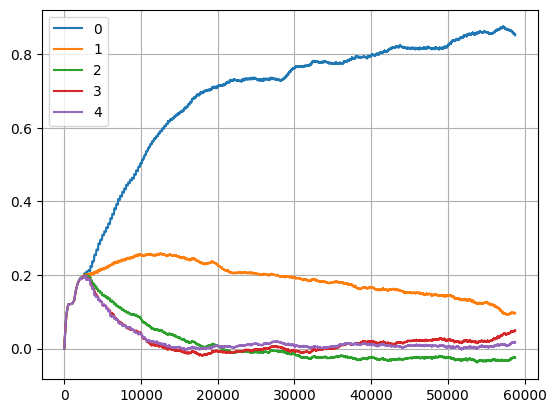

In [32]:
# Depicting all coefficents for all sample rates
w = np.array(w)

#for loop in order to depicting n number of coeeficets during all samples
for n in range(M):
    Wvec = w[:, n]
    plt.plot(Wvec,label=n) 

plt.legend()
plt.grid()
plt.show()



#### If you use the tap-weights as an FIR filter on a different signal with the same kind of added noise, you should see that this signal is also ‘de-noised’. Do you see that?

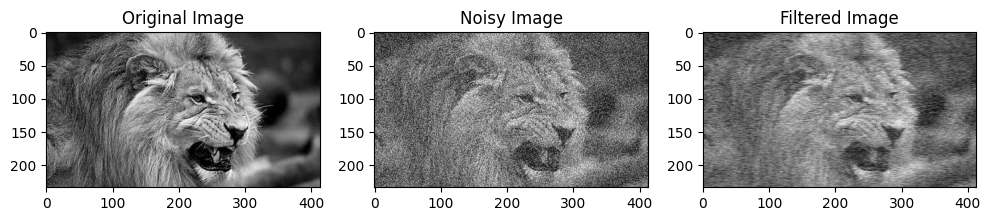

In [20]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Assuming the functions flatten_matrix and Unflatten_matrix are already defined

# Load and preprocess the image
url = 'https://raw.githubusercontent.com/minaghaderi/Linear-Algebra/refs/heads/main/Lion.jpeg'
lion = requests.get(url)
image = Image.open(BytesIO(lion.content)).convert('L')
image_matrix = np.array(image)
image_m = image_matrix - np.mean(image_matrix)

# Add noise to the image
level = 100
noise = np.random.uniform(-level, level, size=np.shape(image_m))
noise_m = noise - np.mean(noise)
noisy_image = image_m + noise_m

# Flatten image and noise
u = flatten_matrix(noisy_image)
d = flatten_matrix(image_m)

# LMS filter initialization
mu = 0.0000001
M = 5
total_sample = u.size
w = np.zeros((total_sample, M))  # Initialize weights
y, W, e = LMS(u, d, w, M, total_sample, mu)

# Compute filtered image using the LMS filter
kk = np.zeros_like(u)
for i in range(M - 1, total_sample - M):
    u_n = u[i - M + 1:i + 1][::-1]  # Reverse slice to match filter length
    kk[i] = np.dot(w[i, :], u_n)  # Perform dot product with weights
kk = kk + np.mean(image_matrix)

# Reshape the output
filtered_image = Unflatten_matrix(kk, noisy_image.shape[0], noisy_image.shape[1])

# Display the results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image_matrix, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.show()


Think about how else you can evaluate the LMS results.

`Signal-to-Noise Ratio (SNR):`

Compute the SNR before and after filtering. SNR can help assess the improvement in the signal quality due to the filtering process. A higher SNR after filtering indicates a successful noise reduction.

In [21]:
# Function to calculate the Signal-to-Noise Ratio (SNR)
def calculate_snr(signal, noise):
    signal_power = np.mean(signal**2)  # Compute signal power
    noise_power = np.mean(noise**2)    # Compute noise power
    return abs(10 * np.log10(signal_power / noise_power))  # Calculate SNR in dB

# Calculate SNR before and after filtering
snr_before = calculate_snr(image_m, noisy_image - image_m)  # SNR before filtering
snr_after = calculate_snr(image_m, filtered_image - image_m)  # SNR after filtering

# Print the SNR values
print(f'SNR Before Filtering: {snr_before} dB')
print(f'SNR After Filtering: {snr_after} dB')


SNR Before Filtering: 0.9340077850722459 dB
SNR After Filtering: 5.893213665192053 dB
